In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [23]:
data = pd.read_csv('unicornios.csv')

,Company,Valuation(US$ billions),Valuation date,Industry,Country/countries,Founder(s)
0,ByteDance,400,April 2021[12],Internet,China,"Zhang Yiming, Liang Rubo"
1,Shein,100,April 2022[13],E-commerce,China,Chris Xu
2,SpaceX,100,October 2021[14],Aerospace,US,Elon Musk
3,Stripe,95,March 2021[15],Financial services,US / Ireland,Patrick and John Collison
4,Klarna,45.6,June 2021[16],Financial technology,Sweden,"Sebastian Siemiatkowski, Niklas Adalberth, Vic..."
...,...,...,...,...,...,...
630,Zuoyebang,1+,July 2018[129],NaN,China,NaN
631,Einride,1.44,April 2022[574],Technology,Sweden,NaN
632,Voi,1+,April 2022[575],NaN,Sweden,NaN
633,Bitkub,1+,November 2021[576][577],Financial technology,Thailand,NaN


In [3]:
data.shape

(635, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Company                  635 non-null    object
 1   Valuation(US$ billions)  635 non-null    object
 2   Valuation date           635 non-null    object
 3   Industry                 567 non-null    object
 4   Country/countries        635 non-null    object
 5   Founder(s)               120 non-null    object
dtypes: object(6)
memory usage: 29.9+ KB


In [61]:
data_arg=data[data['Country/countries']=='Argentina']
data_arg

,Company,Valuation(US$ billions),Valuation date,Industry,Country/countries,Founder(s)
187,TiendaNube,3.10,August 2021[196],E-commerce,Argentina,NaN
249,Ualá,2.45,November 2019[citation needed],Personal finance,Argentina,NaN


In [5]:
data['Valuation(US$ billions)'].value_counts()

1+      157
2        31
3        27
1.2      27
1.4      19
       ... 
8.3       1
9         1
2.39      1
1.04      1
21        1
Name: Valuation(US$ billions), Length: 149, dtype: int64

In [37]:
for i in range(len(data['Valuation(US$ billions)'])):
    #print('1', data['Valuation(US$ billions)'][i])
    if '+' in data['Valuation(US$ billions)'][i]:
        data['Valuation(US$ billions)'][i]=data['Valuation(US$ billions)'][i].replace('+','')
        
data['Valuation(US$ billions)']=round(data['Valuation(US$ billions)'].astype('float32'), 2)

In [38]:
data['Valuation(US$ billions)'].value_counts()

1.00     158
2.00      37
3.00      28
1.20      27
1.50      20
        ... 
13.30      1
13.00      1
1.93       1
16.50      1
8.10       1
Name: Valuation(US$ billions), Length: 143, dtype: int64

<AxesSubplot:xlabel='Company'>

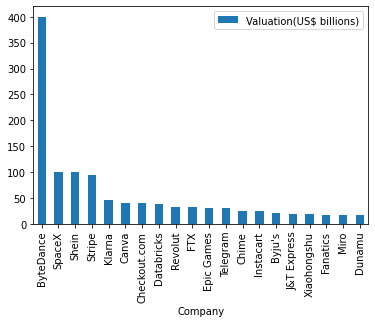

In [46]:
data[['Company','Valuation(US$ billions)']].sort_values(by='Valuation(US$ billions)',ascending= False).head(20).plot.bar(x= 'Company')

In [21]:
data2 = round(data.groupby('Industry').sum()[['Valuation(US$ billions)']], 2)
data2.sort_values(by='Valuation(US$ billions)', ascending= False)

,Valuation(US$ billions)
Industry,
Internet,435.000000
Financial technology,285.670013
E-commerce,229.199997
Software,194.710007
Financial services,160.949997
...,...
Meal kit,1.000000
Media,1.000000
Electronics,1.000000


Text(0, 0.5, 'Billions US$')

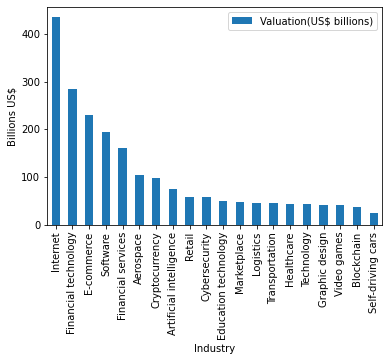

In [60]:
graph = data2.sort_values(by='Valuation(US$ billions)', ascending= False).head(20).plot(kind='bar')
graph.set_ylabel('Billions US$')

<AxesSubplot:>

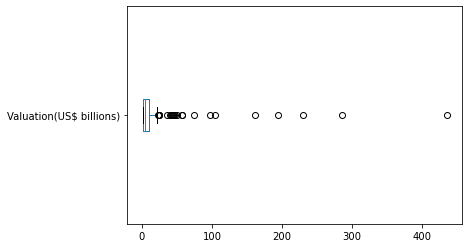

In [22]:
data2.plot(kind='box', vert=False, figsize=(6,4))

Text(0, 0.5, 'Number of companies')

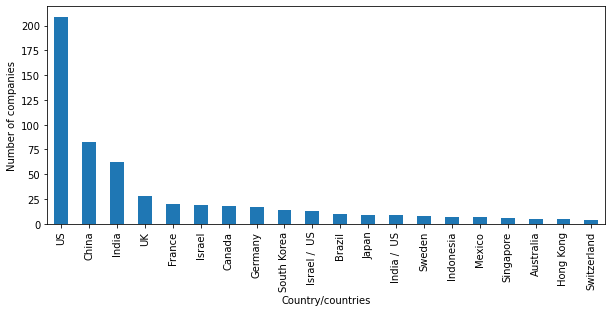

In [54]:
data3 = data.groupby('Country/countries').size()

ax = data3.sort_values(ascending=False).head(20).plot(kind='bar', figsize=(10,4))
ax.set_ylabel('Number of companies')